In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files = os.listdir('/content/drive/MyDrive/Colab_Notebooks/Final-project/Normal/images')

In [ ]:
# read in the dataframe of images paths and labels
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Final-project/merged_image_data.csv')
df.head()

,image_path,label
0,./Normal/images/Normal-6196.png,Normal-6196.png
1,./Normal/images/Normal-7288.png,Normal-7288.png
2,./Normal/images/Normal-1821.png,Normal-1821.png
3,./Normal/images/Normal-4781.png,Normal-4781.png
4,./Normal/images/Normal-4959.png,Normal-4959.png


In [ ]:
# # read in the csv as a data frame
# df = pd.read_csv('merged_image_data.csv')
# df.tail()

,image_path,label
21160,./Viral_Pneumonia/images/Viral Pneumonia-972.png,Viral Pneumonia-972.png
21161,./Viral_Pneumonia/images/Viral Pneumonia-741.png,Viral Pneumonia-741.png
21162,./Viral_Pneumonia/images/Viral Pneumonia-999.png,Viral Pneumonia-999.png
21163,./Viral_Pneumonia/images/Viral Pneumonia-755.png,Viral Pneumonia-755.png
21164,./Viral_Pneumonia/images/Viral Pneumonia-769.png,Viral Pneumonia-769.png


In [ ]:
# make sure the dataframe doesn't include any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  21165 non-null  object
 1   label       21165 non-null  object
dtypes: object(2)
memory usage: 330.8+ KB


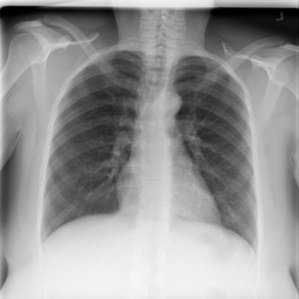

In [ ]:
# open an image using it's path
base_path = '/content/drive/MyDrive/Colab_Notebooks/Final-project/'
file_path = df.iloc[0,0]

path = base_path + file_path
path= path.replace('./', '')
# print(path)
Image.open(path)

In [ ]:
# build a list of imported images using the "image_path" column of the imported df

base_path = '/content/drive/MyDrive/Colab_Notebooks/Final-project/'
images = []
for i in range(len(df)):
    file_path = df.iloc[i,0]
    path = base_path + file_path
    path= path.replace('./', '')
    print(f'{i} of {len(df)}: Attempting to import {file_path}')
    try:
        images.append(Image.open(path))
    except:
        print(f'FAILED: {file_path}')

Streaming output truncated to the last 5000 lines.
16165 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-986.png
16166 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-5471.png
16167 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-3000.png
16168 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-3766.png
16169 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-4009.png
16170 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-5317.png
16171 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-2478.png
16172 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-1171.png
16173 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-3955.png
16174 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-2493.png
16175 of 21165: Attempting to import ./Lung_Opacity/images/Lung_Opacity-4784.png
16176 of 21165: Attempting to import ./Lung_Opacity/images/

In [ ]:
# check the length of the list to make sure everything has been added
len(images)

21165

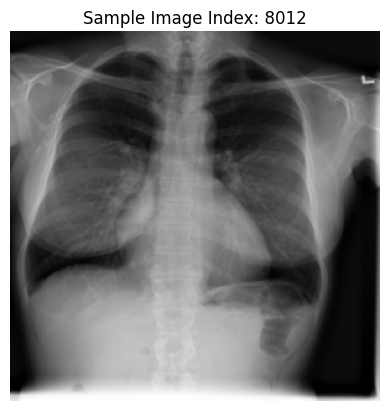

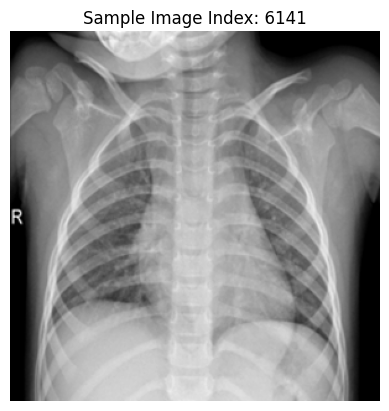

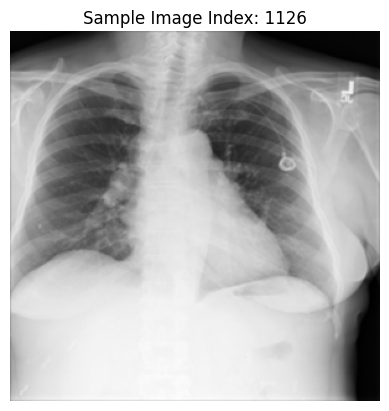

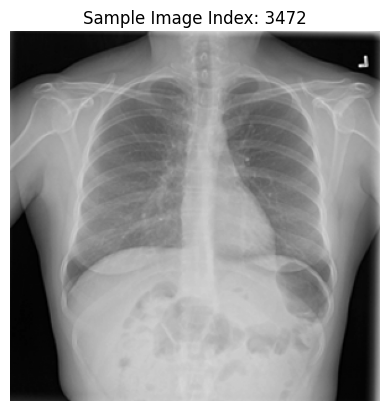

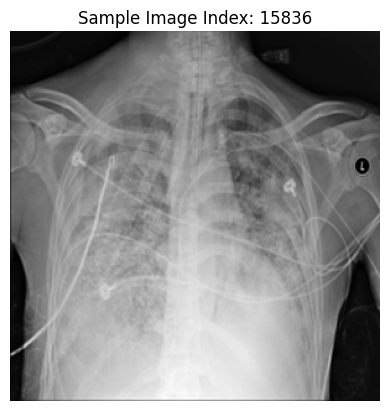

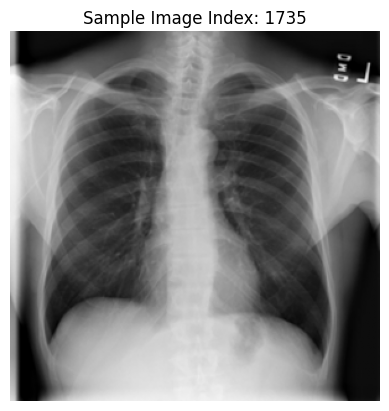

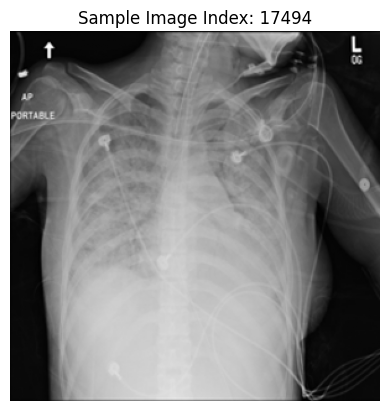

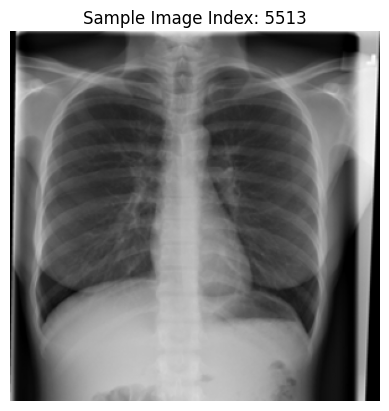

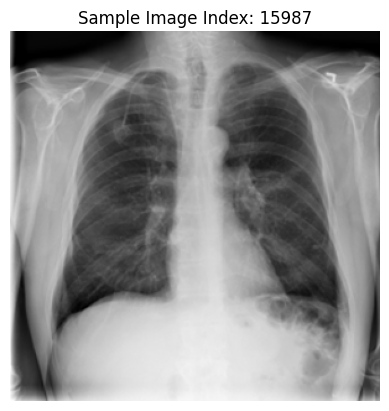

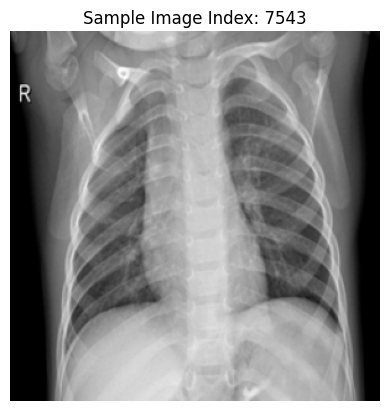

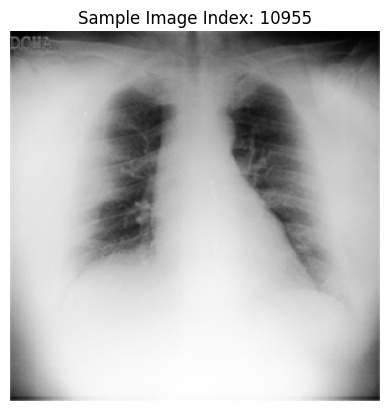

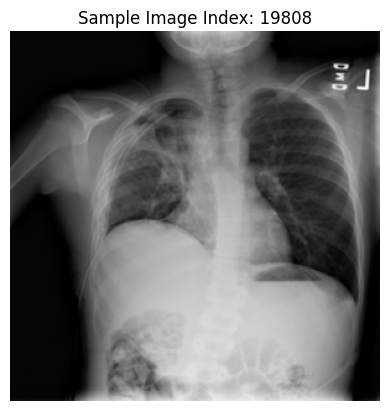

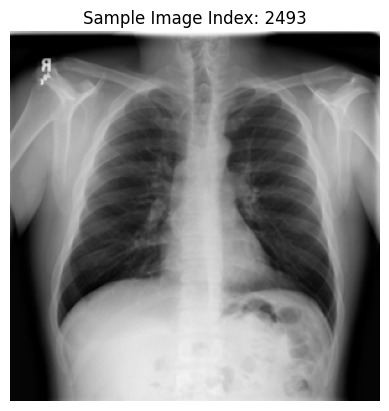

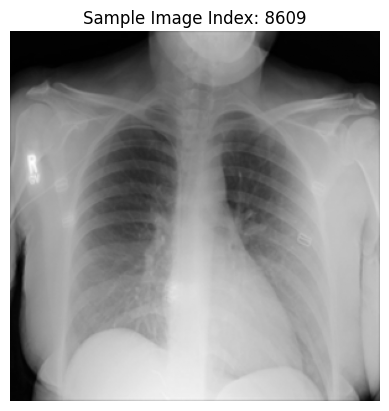

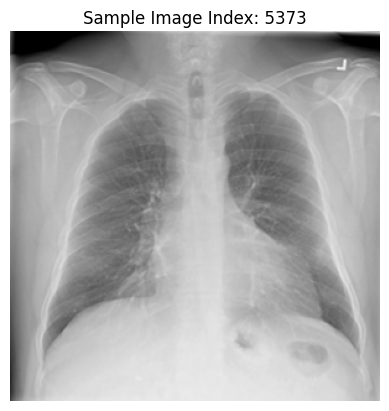

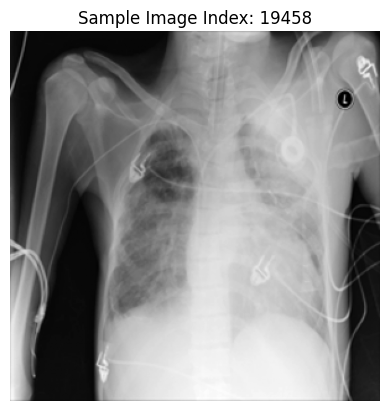

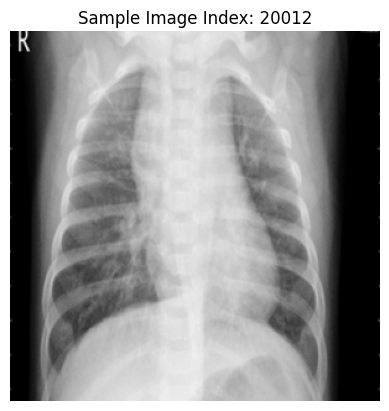

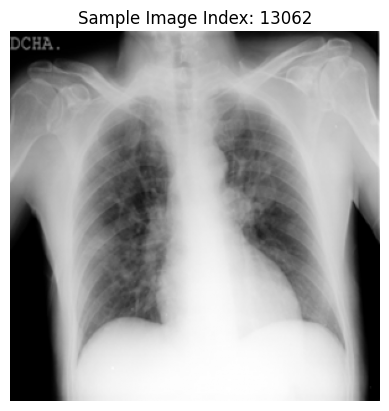

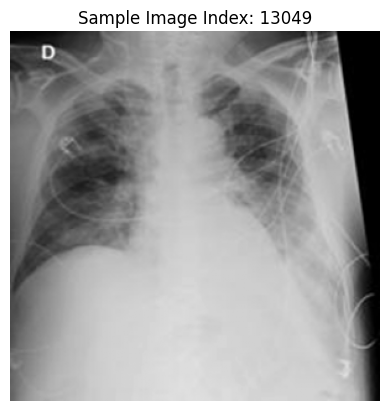

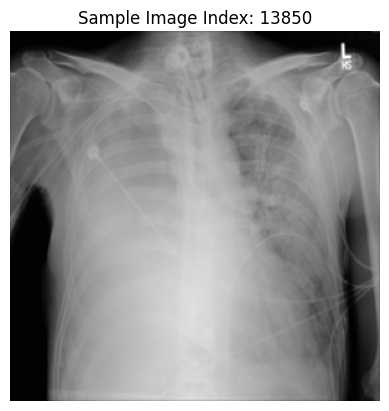

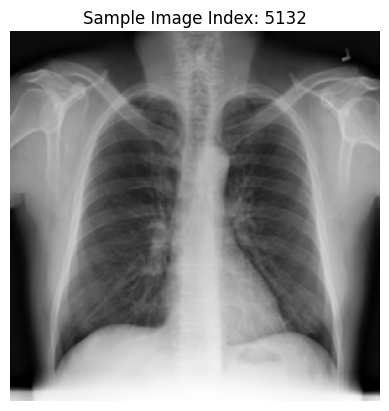

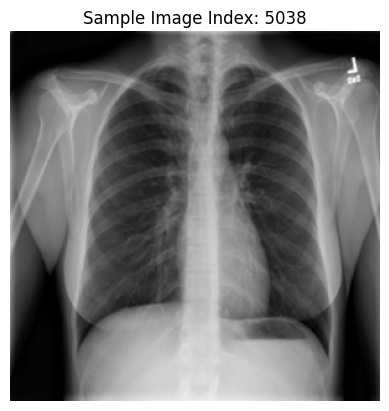

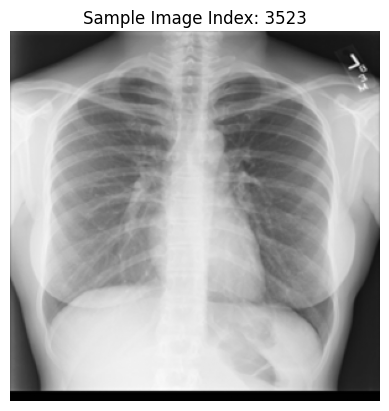

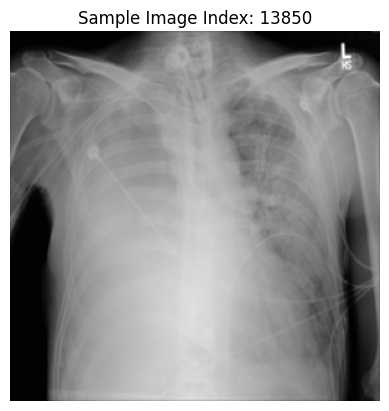

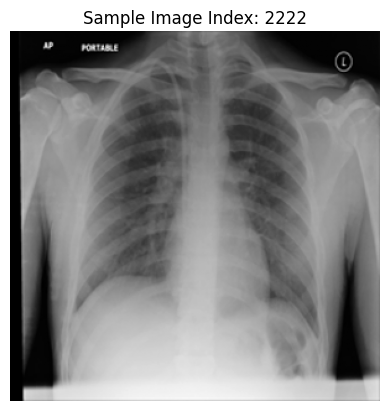

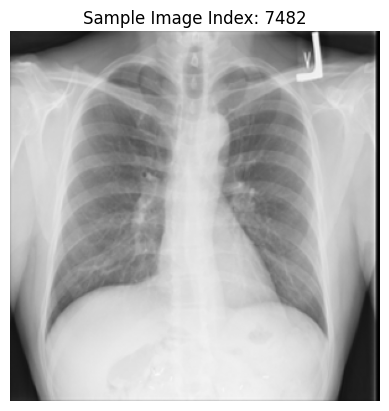

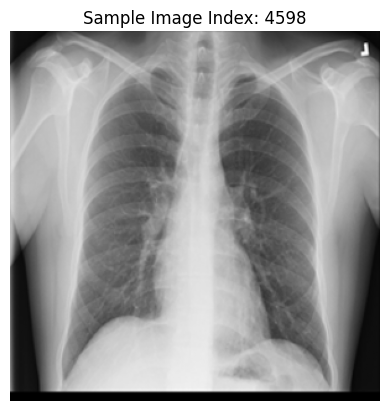

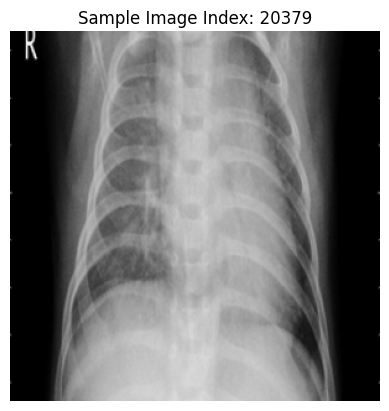

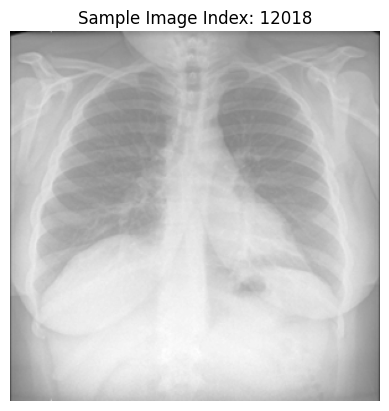

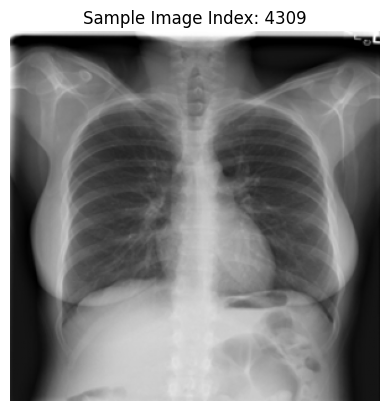

In [ ]:
# look at 30 random images in the images list
# create a list of 30 random numbers 0 length of the images list
sample_img_index = [np.random.randint(0,len(images)) for i in range(30)]

# # for each number in the sample_img_index, show the sample image
import matplotlib.pyplot as plt

for i in sample_img_index:
    plt.imshow(images[i], cmap= 'gray')
    plt.title(f"Sample Image Index: {i}")
    plt.axis('off')  # Turn off axes for a cleaner display
    plt.show()

In [ ]:

# Open a new file named 'img.pkl' with write permission
with open('/content/drive/My Drive/Colab_Notebooks/Final-project/img.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(images, file)

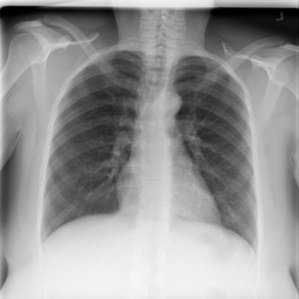

In [ ]:
# Load the images from the pkl file
with open('/content/drive/My Drive/Colab_Notebooks/Final-project/img.pkl', 'rb') as file:
    images = pickle.load(file)

images[0]

In [ ]:
# Get all the sizes into a list, then convert to a set
sizes = set([image.size for image in images])
sizes

{(299, 299)}

In [ ]:
# since all the images are the same size, we won't need to resize them
# Convert all images to floating point numpy arrays
float_images = [np.array(image).astype(np.float32) for image in images]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[248. 246. 243. ... 221. 220. 203.]
 [241. 238. 235. ... 217. 217. 199.]
 [231. 228. 224. ... 210. 209. 193.]
 ...
 [220. 214. 210. ... 200. 201. 185.]
 [222. 217. 212. ... 201. 202. 188.]
 [224. 219. 213. ... 202. 203. 189.]]


In [ ]:
# To normalize images to a range between 0 and 1,
# we need to divide all pixel values by the max of 255

normalized_images = [image/255 for image in float_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(normalized_images[0])

Pixel Values:
[[0.972549   0.9647059  0.9529412  ... 0.8666667  0.8627451  0.79607844]
 [0.94509804 0.93333334 0.92156863 ... 0.8509804  0.8509804  0.78039217]
 [0.90588236 0.89411765 0.8784314  ... 0.8235294  0.81960785 0.75686276]
 ...
 [0.8627451  0.8392157  0.8235294  ... 0.78431374 0.7882353  0.7254902 ]
 [0.87058824 0.8509804  0.83137256 ... 0.7882353  0.7921569  0.7372549 ]
 [0.8784314  0.85882354 0.8352941  ... 0.7921569  0.79607844 0.7411765 ]]


In [ ]:
# Open a new file named 'img_preprocessed.pkl' with write permission
with open('/content/drive/MyDrive/Colab_Notebooks/Final-project/img_preprocessed.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(normalized_images, file)

In [ ]:
# Load the images from the img_preprocessed.pkl file
with open('/content/drive/MyDrive/Colab_Notebooks/Final-project/img_preprocessed.pkl', 'rb') as file:
    normalized_images = pickle.load(file)

normalized_images[0]

array([[0.972549  , 0.9647059 , 0.9529412 , ..., 0.8666667 , 0.8627451 ,
        0.79607844],
       [0.94509804, 0.93333334, 0.92156863, ..., 0.8509804 , 0.8509804 ,
        0.78039217],
       [0.90588236, 0.89411765, 0.8784314 , ..., 0.8235294 , 0.81960785,
        0.75686276],
       ...,
       [0.8627451 , 0.8392157 , 0.8235294 , ..., 0.78431374, 0.7882353 ,
        0.7254902 ],
       [0.87058824, 0.8509804 , 0.83137256, ..., 0.7882353 , 0.7921569 ,
        0.7372549 ],
       [0.8784314 , 0.85882354, 0.8352941 , ..., 0.7921569 , 0.79607844,
        0.7411765 ]], dtype=float32)

In [ ]:
#check the length and shape of the read in normalized images to make sure they have been processed correctly
print(len(normalized_images))
print(normalized_images[0].shape)

21165
(299, 299)
